In [1]:
import json
import utilfuncs
import dataloader as dl
import plotmaker as pm

cache_path = "Data/cache.json"

In [2]:
cache = json.load(open(cache_path, "r"))

gal_list = list(cache.keys())
print(f"List of galaxies: {gal_list[1:]}")

# utilfunc.load_data(cache_path, table_columns*, kw_arg(galaxy, paper, etc))
# TODO: A universal data-loading function
# TODO: Understand what each paper is doing

# Presentation for all the literature that I've covered. Understand what's been done 
#   and how the data has been collected. Goal: 20~30 min summary talk, tell audience 
#   which reference is the best to be used for what, and how much we should trust them.
#   Include a bit of cross-comparison, compare what each study has done for the same physical value

# List of questions:
# - Instruments for each paper
# - Spectral resolution, 
# - Fitting methodlogy, and put them in README. 
# (There tend to be two modes: equivalent width, which is to fit absorption features individually,
# and spectrum synthesis, where they use a model spectrum to compare with the whole observed spectrum)
# - Check consistency between papers. 
# The idea is to check how robust the data is. Which one should be trust more than the other?
# Either answer that question, or put forward the information that will help answering that question.

List of galaxies: ['Scl', 'For', 'LeoI', 'Sex', 'LeoII', 'CVnI', 'UMi', 'Dra', 'NGC2419', 'M68', 'M15', 'UMaII', 'M2', 'M53', 'LeoA', 'Aquarius', 'SagDIG', 'TriII', 'Car', 'BooI', 'Sgr', 'RetII', 'SegI', 'AndromedaVII', 'AndromedaI', 'AndromedaIII', 'AndromedaV', 'AndromedaX']


In [3]:
cache["Meta data"]['Included titles']['Theler 2020']['Columns']

['o_Ni_Fe',
 'Imag',
 'Eu_Fe',
 'e_Ni_Fe',
 'er_Eu_Fe',
 'e_Co_Fe',
 'Hmag',
 'er_Ba_Fe',
 'er_Ni_Fe',
 'l_RV',
 'e_Ba_Fe',
 'Ni_Fe',
 '_',
 'o_Ba_Fe',
 'Ba_Fe',
 'Name',
 'e_RV',
 'RAJ2000',
 'DEJ2000',
 'RV',
 'Kmag',
 'Vmag',
 'er_Co_Fe',
 'e_Eu_Fe',
 'Co_Fe',
 'Simbad',
 'Jmag']

In [4]:
# Watch out for the edge case: two stars being named the same way by two different papers
# Download Apogee?
# Expand the README page to to include the sources
# Include a column to link the instrument

# A function, if specify element & dSph name, return an astropy.table with star name, ONE RE & DEC for each star, and column from either catalog
# If a star is in two references, return the values from both literatures, and make them into an astropy.table

# Add the following functions
# 1. A list of dSphs, a list of element abundances, and return a table containing name, RA, DEC, and the abundance of each element, and a column indicating source of data, and a column of galaxy
#    Generate unique ID for each star. One star may take multiple rows, but we know they're the same star given a unique ID.
#    Rows = number of measurements, columns = number of things being measured
# 2. 

In [5]:
# Set catalog_type to "VizieR" to distinguish between Vizier and manually imported data files

# TODO when refreshing the cache:
# - Saving a catalog type (i.e. VizieR)
# - Saving the vizier table name
# - Read database into an exportable table

Residual mean: 2.3330589161277e-12, std: 0.035781340695624386


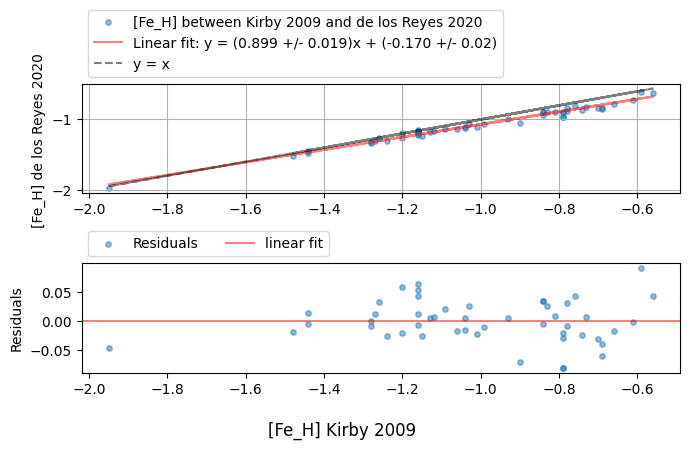

In [9]:
# Cross match between Kirby 2009 and Hill 2019 over Scl
test = pm.data_for_crossmatch(cache_path, ["Kirby 2009", "de los Reyes 2020"], 'Fe_H', ['For'],)
fit_param, fit_data, resi = pm.plot_crossmatch(test,
                                   savepath="Plots/For Cross Reference.png",
                                   plot_size=(7, 4.5))

In [22]:
len(fit_data[0])

94

In [10]:
cat_count = 0
max_star = ''
for gal in list(cache.keys()):
    if gal == "Meta data":
        continue
    galaxy = cache[gal]
    for s in list(galaxy.keys()):
        star = galaxy[s]
        cat_list = list(star.keys())
        if len(cat_list) > cat_count:
            cat_count = len(cat_list)
            max_star = s

print(f"Max cat: {cat_count}, max star: {max_star}")
        

Max cat: 6, max star: Scl_107


Text(0.5, 0, 'Galaxy')

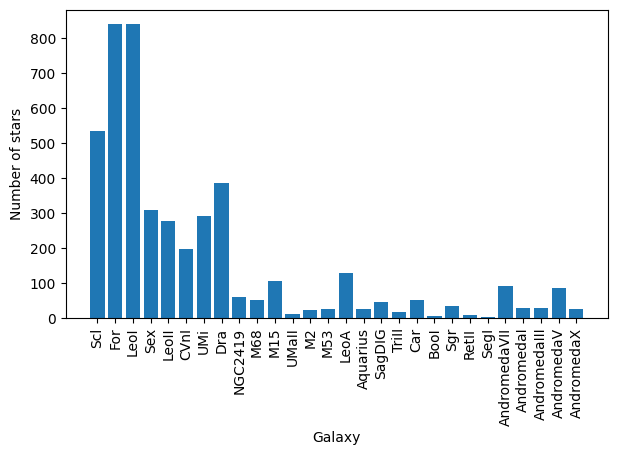

In [25]:
from matplotlib import pyplot as plt
import numpy as np

gal_list = []
gal_size = []
for gal in list(cache.keys()):
    if gal == "Meta data":
        continue
    gal_list.append(gal)
    gal_size.append(len(cache[gal]))

fig, ax = plt.subplots(1, 1, figsize = (7, 4))

ax.bar(gal_list, gal_size, label = "Galaxy size")
gal_num = np.arange(len(gal_list))
ax.set_xticks(gal_num, gal_list, rotation = 'vertical')
ax.set_ylabel("Number of stars")
ax.set_xlabel("Galaxy")